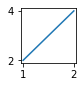

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.plot([1,2],[2,4])
plt.show()

In [2]:
# Now import everything else
import numpy as np
import pylab
import time


# Camera Object

In [9]:
# Make a camera object
#from CamFLIR import CamFLIR
from CamHamThread import CamHamThread
cam=CamHamThread(exposure=0.5,SensitivityGain=100,CCDMode="EMCCD")

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\jonesb\Anaconda3\envs\camera\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\jonesb\Anaconda3\envs\camera\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\jonesb\Documents\GitHub\MicroscopeControlSuite\CamHamThread.py", line 30, in ThreadFunction
    with dcam:
  File "C:\Users\jonesb\Anaconda3\envs\camera\lib\site-packages\hamamatsu\dcam.py", line 1800, in __enter__
    self.open()
  File "C:\Users\jonesb\Anaconda3\envs\camera\lib\site-packages\hamamatsu\dcam.py", line 1846, in open
    self.dcamapi_init(ctypes.byref(state))
  File "C:\Users\jonesb\Anaconda3\envs\camera\lib\site-packages\hamamatsu\dcam.py", line 1832, in func
    raise DCAMError(EError(r), name)
hamamatsu.dcam.DCAMError: DCAMError: 'dcamapi_init' raised NOCAMERA (2147484166)



In [4]:
#This is how you take a photo
img=cam.Snap(1)

KeyboardInterrupt: 

In [ ]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img[0],clim=(2000,50000))

# Stage Object

In [3]:
#Initiate a stage object
from Stage import Stage
stg=Stage()

In [93]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  1.5 1.53 3.6362121212121212


In [382]:
Y=stg.Y
for i in range(0,10):
    stg.MoveToY(Y)
    time.sleep(1)
    stg.MoveToY(Y+0.001)
    time.sleep(1)

KeyboardInterrupt: 

In [16]:
#Move in X and into focus
#time.sleep(5)
stg.MoveToY(-0.75)
#stg.MoveToZ(3.5325)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 -0.75 3.8


In [ ]:
3.4964

In [365]:
#time.sleep(5)
stg.MoveToX(0)
stg.MoveToY(-2.85)
stg.MoveToZ(3.3865)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 -2.85 3.3865


# Scan Example

In [4]:
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        #pics.append(cam.Snap(1)[0])
        print(Zs[i])
        time.sleep(1)

    return pics

In [302]:
Zs=np.linspace(3.4,3.55,100)
pics=MakeImageSweep(Zs,showthem=True)

3.4
3.4015151515151514
3.403030303030303
3.4045454545454543


KeyboardInterrupt: 

In [ ]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,5000)

In [ ]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)